In [1]:
import numpy as np
import re
import json
import matplotlib.pyplot as plt

In [2]:
def is_correct(a,b,div,accuracy_digit):
    return round(a/b,accuracy_digit) == round(div,accuracy_digit)

def get_num_digits(num):
    return len(str(num).split('.')[0].replace('-',''))

def rel_error(a,b,ans,sig_figs):
    true_ans = round(a/b,sig_figs)
    return abs(true_ans - ans)/true_ans  

In [3]:
responses_acc4 = []
with open('gemini_response/div_acc4_response.txt','r') as file:
    for line in file:
        # strip the newline character
        line = line.strip()
        # append the line to the list
        responses_acc4.append(line)

print('Number of responses for accuracy 4:', len(responses_acc4))

MAX_DIGITS = 6

total_acc4 = np.zeros((3,2,MAX_DIGITS))
correct_acc4 = np.zeros((3,2,MAX_DIGITS))
rel_error_acc4 = np.zeros((3,2,MAX_DIGITS))

classified_responses_acc4 = {
                        0:{0:{0:[],1:[],2:[],3:[],4:[],5:[]},1:{0:[],1:[],2:[],3:[],4:[],5:[]}},
                        1:{0:{0:[],1:[],2:[],3:[],4:[],5:[]},1:{0:[],1:[],2:[],3:[],4:[],5:[]}},
                        2:{0:{0:[],1:[],2:[],3:[],4:[],5:[]},1:{0:[],1:[],2:[],3:[],4:[],5:[]}}
                       }
# axis 0: sign of both numbers, 0: both positive, 1: one negative, 2: both negative
# axis 1: order of the numbers, 0: both same order, 1: different order
# axis 2: number of digits in highest order number

for response in responses_acc4:
    # split at '=' to get the numbers and the division
    a_b, div = response.split('=')
    # split at '/' to get the numbers
    a,b = a_b.split('/')

    # convert all into floats
    a = float(a)
    b = float(b)
    div = float(div)

    # get sign of a and b
    sign_a = 0 if a >= 0 else 1
    sign_b = 0 if b >= 0 else 1

    # sign shows if both numbers are positive or negative or one of them is negative
    sign = sign_a + sign_b

    # get the number of digits in the highest order number
    digit_a = get_num_digits(a)
    digit_b = get_num_digits(b)

    # order shows if the numbers are in the same order or different order
    order = 0 if digit_a == digit_b else 1

    # get number of digits in the highest order number
    num_digits = max(digit_a,digit_b)

    # increment the total count
    total_acc4[sign,order,num_digits-1] += 1
    correct_acc4[sign,order,num_digits-1] += is_correct(a,b,div,4)
    rel_error_acc4[sign,order,num_digits-1] += rel_error(a,b,div,4)

    # classify the response
    classified_responses_acc4[sign][order][num_digits-1].append(response)

total_acc4 = np.where(total_acc4 == 0, 1, total_acc4)

Number of responses for accuracy 4: 3436


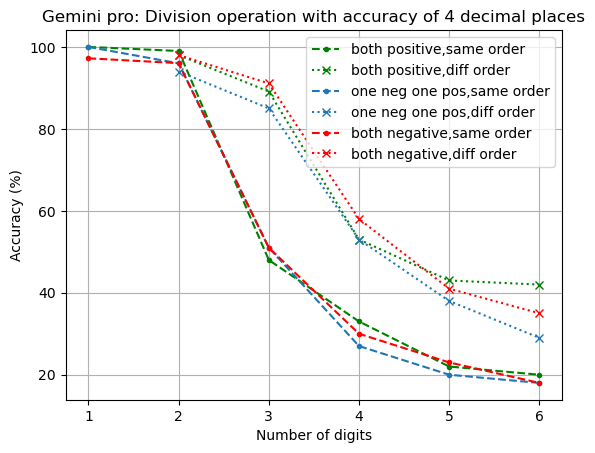

In [4]:
accuracy_acc4 = correct_acc4*100/total_acc4
digits = np.arange(1,MAX_DIGITS+1)

# plot the accuracy for different number of digits
plt.plot(digits, accuracy_acc4[0,0],marker='o',ms=3,linestyle='--',color='green',label='both positive,same order')
plt.plot(digits[1:], accuracy_acc4[0,1,1:],marker='x',linestyle=':',color='green',label='both positive,diff order')
plt.plot(digits, accuracy_acc4[1,0],marker='o',ms=3,linestyle='--',color='#1f77b4',label='one neg one pos,same order')
plt.plot(digits[1:], accuracy_acc4[1,1,1:],marker='x',linestyle=':',color='#1f77b4',label='one neg one pos,diff order')
plt.plot(digits, accuracy_acc4[2,0],marker='o',ms=3,linestyle='--',color='red',label='both negative,same order')
plt.plot(digits[1:], accuracy_acc4[2,1,1:],marker='x',linestyle=':',color='red',label='both negative,diff order')
plt.xlabel('Number of digits')
plt.ylabel('Accuracy (%)')
plt.title('Gemini pro: Division operation with accuracy of 4 decimal places')
plt.legend()
plt.grid()
plt.savefig('gemini_response/plots/division_acc4_accuracy.png')
plt.show()

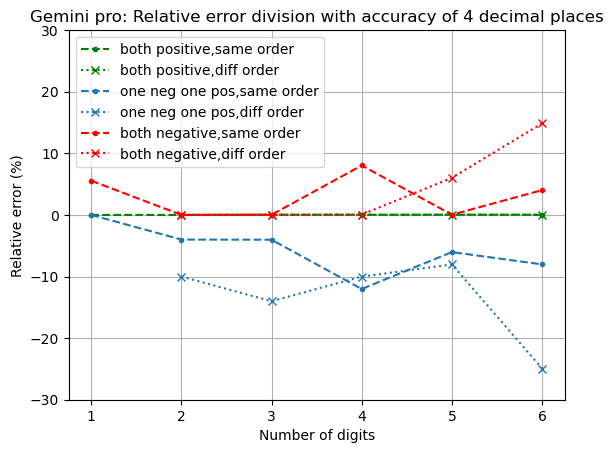

In [5]:
rel_err_accuracy_acc4 = rel_error_acc4*100/total_acc4
digits = np.arange(1,MAX_DIGITS+1)

# plot the accuracy for different number of digits
plt.plot(digits, rel_err_accuracy_acc4[0,0],marker='o',ms=3,linestyle='--',color='green',label='both positive,same order')
plt.plot(digits[1:], rel_err_accuracy_acc4[0,1,1:],marker='x',linestyle=':',color='green',label='both positive,diff order')
plt.plot(digits, rel_err_accuracy_acc4[1,0],marker='o',ms=3,linestyle='--',color='#1f77b4',label='one neg one pos,same order')
plt.plot(digits[1:],rel_err_accuracy_acc4[1,1,1:],marker='x',linestyle=':',color='#1f77b4',label='one neg one pos,diff order')
plt.plot(digits, rel_err_accuracy_acc4[2,0],marker='o',ms=3,linestyle='--',color='red',label='both negative,same order')
plt.plot(digits[1:], rel_err_accuracy_acc4[2,1,1:],marker='x',linestyle=':',color='red',label='both negative,diff order')
plt.xlabel('Number of digits')
plt.ylabel('Relative error (%)')
plt.ylim(-30,30)
plt.title('Gemini pro: Relative error division with accuracy of 4 decimal places')
plt.legend()
plt.grid()
plt.savefig('gemini_response/plots/division_acc4_rel_error.png')
plt.show()

In [6]:
responses_acc8 = []
with open('gemini_response/div_acc8_response.txt','r') as file:
    for line in file:
        # strip the newline character
        line = line.strip()
        # append the line to the list
        responses_acc8.append(line)

print('Number of responses for accuracy 8:', len(responses_acc8))

MAX_DIGITS = 6

total_acc8 = np.zeros((3,2,MAX_DIGITS))
correct_acc8 = np.zeros((3,2,MAX_DIGITS))
rel_error_acc8 = np.zeros((3,2,MAX_DIGITS))

classified_responses_acc8 = {
                        0:{0:{0:[],1:[],2:[],3:[],4:[],5:[]},1:{0:[],1:[],2:[],3:[],4:[],5:[]}},
                        1:{0:{0:[],1:[],2:[],3:[],4:[],5:[]},1:{0:[],1:[],2:[],3:[],4:[],5:[]}},
                        2:{0:{0:[],1:[],2:[],3:[],4:[],5:[]},1:{0:[],1:[],2:[],3:[],4:[],5:[]}}
                       }
# axis 0: sign of both numbers, 0: both positive, 1: one negative, 2: both negative
# axis 1: order of the numbers, 0: both same order, 1: different order
# axis 2: number of digits in highest order number

for response in responses_acc8:
    # split at '=' to get the numbers and the division
    a_b, div = response.split('=')
    # split at '/' to get the numbers
    a,b = a_b.split('/')

    # convert all into floats
    a = float(a)
    b = float(b)
    div = float(div)

    # get sign of a and b
    sign_a = 0 if a >= 0 else 1
    sign_b = 0 if b >= 0 else 1

    # sign shows if both numbers are positive or negative or one of them is negative
    sign = sign_a + sign_b

    # get the number of digits in the highest order number
    digit_a = get_num_digits(a)
    digit_b = get_num_digits(b)

    # order shows if the numbers are in the same order or different order
    order = 0 if digit_a == digit_b else 1

    # get number of digits in the highest order number
    num_digits = max(digit_a,digit_b)

    # increment the total count
    total_acc8[sign,order,num_digits-1] += 1
    correct_acc8[sign,order,num_digits-1] += is_correct(a,b,div,8)
    rel_error_acc8[sign,order,num_digits-1] += rel_error(a,b,div,8)

    # classify the response
    classified_responses_acc8[sign][order][num_digits-1].append(response)

total_acc8 = np.where(total_acc8 == 0, 1, total_acc8)

Number of responses for accuracy 8: 3434


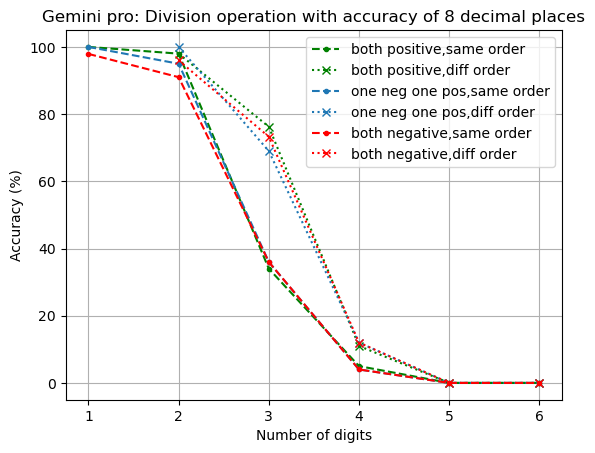

In [7]:
accuracy_acc8 = correct_acc8*100/total_acc8
digits = np.arange(1,MAX_DIGITS+1)

# plot the accuracy for different number of digits
plt.plot(digits, accuracy_acc8[0,0],marker='o',ms=3,linestyle='--',color='green',label='both positive,same order')
plt.plot(digits[1:], accuracy_acc8[0,1,1:],marker='x',linestyle=':',color='green',label='both positive,diff order')
plt.plot(digits, accuracy_acc8[1,0],marker='o',ms=3,linestyle='--',color='#1f77b4',label='one neg one pos,same order')
plt.plot(digits[1:], accuracy_acc8[1,1,1:],marker='x',linestyle=':',color='#1f77b4',label='one neg one pos,diff order')
plt.plot(digits, accuracy_acc8[2,0],marker='o',ms=3,linestyle='--',color='red',label='both negative,same order')
plt.plot(digits[1:], accuracy_acc8[2,1,1:],marker='x',linestyle=':',color='red',label='both negative,diff order')
plt.xlabel('Number of digits')
plt.ylabel('Accuracy (%)')
plt.title('Gemini pro: Division operation with accuracy of 8 decimal places')
plt.legend()
plt.grid()
plt.savefig('gemini_response/plots/division_acc8_accuracy.png')
plt.show()

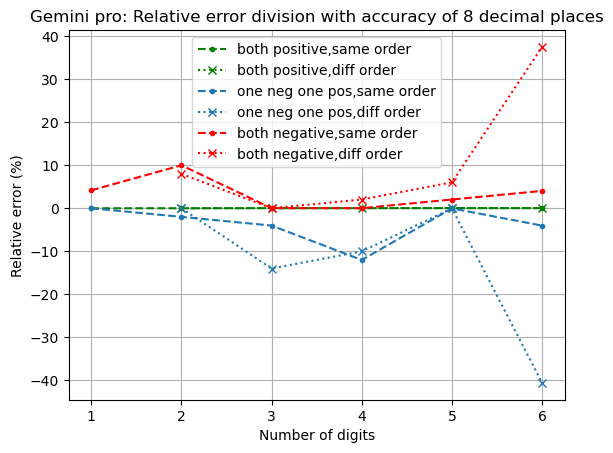

In [8]:
rel_err_accuracy_acc8 = rel_error_acc8*100/total_acc8
digits = np.arange(1,MAX_DIGITS+1)

# plot the accuracy for different number of digits
plt.plot(digits, rel_err_accuracy_acc8[0,0],marker='o',ms=3,linestyle='--',color='green',label='both positive,same order')
plt.plot(digits[1:], rel_err_accuracy_acc8[0,1,1:],marker='x',linestyle=':',color='green',label='both positive,diff order')
plt.plot(digits, rel_err_accuracy_acc8[1,0],marker='o',ms=3,linestyle='--',color='#1f77b4',label='one neg one pos,same order')
plt.plot(digits[1:],rel_err_accuracy_acc8[1,1,1:],marker='x',linestyle=':',color='#1f77b4',label='one neg one pos,diff order')
plt.plot(digits, rel_err_accuracy_acc8[2,0],marker='o',ms=3,linestyle='--',color='red',label='both negative,same order')
plt.plot(digits[1:], rel_err_accuracy_acc8[2,1,1:],marker='x',linestyle=':',color='red',label='both negative,diff order')
plt.xlabel('Number of digits')
plt.ylabel('Relative error (%)')
# plt.ylim(-30,30)
plt.title('Gemini pro: Relative error division with accuracy of 8 decimal places')
plt.legend()
plt.grid()
plt.savefig('gemini_response/plots/division_acc8_rel_error.png')
plt.show()

In [9]:
responses_acc12 = []
with open('gemini_response/div_acc12_response.txt','r') as file:
    for line in file:
        # strip the newline character
        line = line.strip()
        # append the line to the list
        responses_acc12.append(line)

print('Number of responses for accuracy 12:', len(responses_acc12))

MAX_DIGITS = 6

total_acc12 = np.zeros((3,2,MAX_DIGITS))
correct_acc12 = np.zeros((3,2,MAX_DIGITS))
rel_error_acc12 = np.zeros((3,2,MAX_DIGITS))

classified_responses_acc12 = {
                        0:{0:{0:[],1:[],2:[],3:[],4:[],5:[]},1:{0:[],1:[],2:[],3:[],4:[],5:[]}},
                        1:{0:{0:[],1:[],2:[],3:[],4:[],5:[]},1:{0:[],1:[],2:[],3:[],4:[],5:[]}},
                        2:{0:{0:[],1:[],2:[],3:[],4:[],5:[]},1:{0:[],1:[],2:[],3:[],4:[],5:[]}}
                       }
# axis 0: sign of both numbers, 0: both positive, 1: one negative, 2: both negative
# axis 1: order of the numbers, 0: both same order, 1: different order
# axis 2: number of digits in highest order number

for response in responses_acc12:
    # split at '=' to get the numbers and the division
    a_b, div = response.split('=')
    # split at '/' to get the numbers
    a,b = a_b.split('/')

    # convert all into floats
    a = float(a)
    b = float(b)
    div = float(div)

    # get sign of a and b
    sign_a = 0 if a >= 0 else 1
    sign_b = 0 if b >= 0 else 1

    # sign shows if both numbers are positive or negative or one of them is negative
    sign = sign_a + sign_b

    # get the number of digits in the highest order number
    digit_a = get_num_digits(a)
    digit_b = get_num_digits(b)

    # order shows if the numbers are in the same order or different order
    order = 0 if digit_a == digit_b else 1

    # get number of digits in the highest order number
    num_digits = max(digit_a,digit_b)

    # increment the total count
    total_acc12[sign,order,num_digits-1] += 1
    correct_acc12[sign,order,num_digits-1] += is_correct(a,b,div,12)
    rel_error_acc12[sign,order,num_digits-1] += rel_error(a,b,div,12)

    # classify the response
    classified_responses_acc12[sign][order][num_digits-1].append(response)

total_acc12 = np.where(total_acc12 == 0, 1, total_acc12)

Number of responses for accuracy 12: 3445


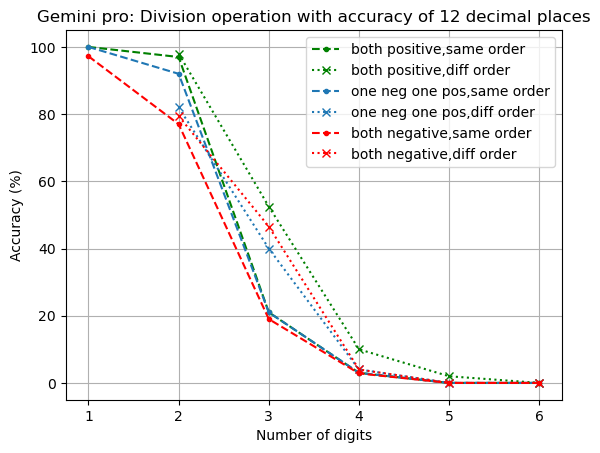

In [10]:
accuracy_acc12 = correct_acc12*100/total_acc12
digits = np.arange(1,MAX_DIGITS+1)

# plot the accuracy for different number of digits
plt.plot(digits, accuracy_acc12[0,0],marker='o',ms=3,linestyle='--',color='green',label='both positive,same order')
plt.plot(digits[1:], accuracy_acc12[0,1,1:],marker='x',linestyle=':',color='green',label='both positive,diff order')
plt.plot(digits, accuracy_acc12[1,0],marker='o',ms=3,linestyle='--',color='#1f77b4',label='one neg one pos,same order')
plt.plot(digits[1:], accuracy_acc12[1,1,1:],marker='x',linestyle=':',color='#1f77b4',label='one neg one pos,diff order')
plt.plot(digits, accuracy_acc12[2,0],marker='o',ms=3,linestyle='--',color='red',label='both negative,same order')
plt.plot(digits[1:], accuracy_acc12[2,1,1:],marker='x',linestyle=':',color='red',label='both negative,diff order')
plt.xlabel('Number of digits')
plt.ylabel('Accuracy (%)')
plt.title('Gemini pro: Division operation with accuracy of 12 decimal places')
plt.legend()
plt.grid()
plt.savefig('gemini_response/plots/division_acc12_accuracy.png')
plt.show()

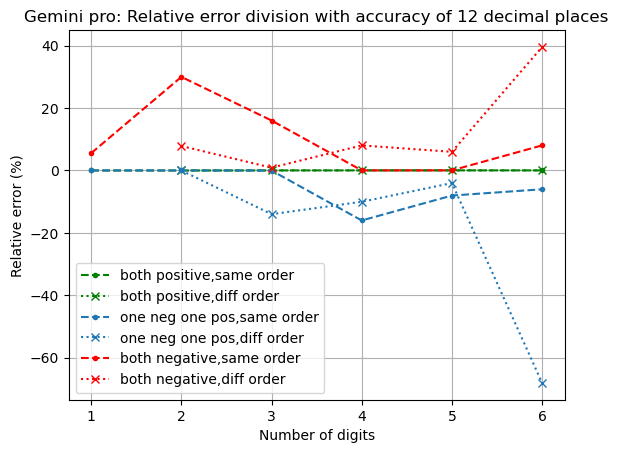

In [11]:
rel_err_accuracy_acc12 = rel_error_acc12*100/total_acc12
digits = np.arange(1,MAX_DIGITS+1)

# plot the accuracy for different number of digits
plt.plot(digits, rel_err_accuracy_acc12[0,0],marker='o',ms=3,linestyle='--',color='green',label='both positive,same order')
plt.plot(digits[1:], rel_err_accuracy_acc12[0,1,1:],marker='x',linestyle=':',color='green',label='both positive,diff order')
plt.plot(digits, rel_err_accuracy_acc12[1,0],marker='o',ms=3,linestyle='--',color='#1f77b4',label='one neg one pos,same order')
plt.plot(digits[1:],rel_err_accuracy_acc12[1,1,1:],marker='x',linestyle=':',color='#1f77b4',label='one neg one pos,diff order')
plt.plot(digits, rel_err_accuracy_acc12[2,0],marker='o',ms=3,linestyle='--',color='red',label='both negative,same order')
plt.plot(digits[1:], rel_err_accuracy_acc12[2,1,1:],marker='x',linestyle=':',color='red',label='both negative,diff order')
plt.xlabel('Number of digits')
plt.ylabel('Relative error (%)')
# plt.ylim(-30,30)
plt.title('Gemini pro: Relative error division with accuracy of 12 decimal places')
plt.legend()
plt.grid()
plt.savefig('gemini_response/plots/division_acc12_rel_error.png')
plt.show()

In [12]:
def avg_of_non_zero_elem_for_each_digit(arr):
    '''
    calculate the average of non zero elements for each digit (axis 2) across axis 0 and 1
    '''
    # get count of non zero elements across axis 0 and 1
    non_zero_count = np.count_nonzero(arr, axis=(0, 1))

    # get sum of non zero elements across axis 0 and 1
    non_zero_sum = np.sum(arr * (arr != 0), axis=(0, 1))

    # calculate average
    avg = non_zero_sum/non_zero_count

    return avg


/tmp/ipykernel_443787/4113171277.py:12: RuntimeWarning: invalid value encountered in divide
  avg = non_zero_sum/non_zero_count


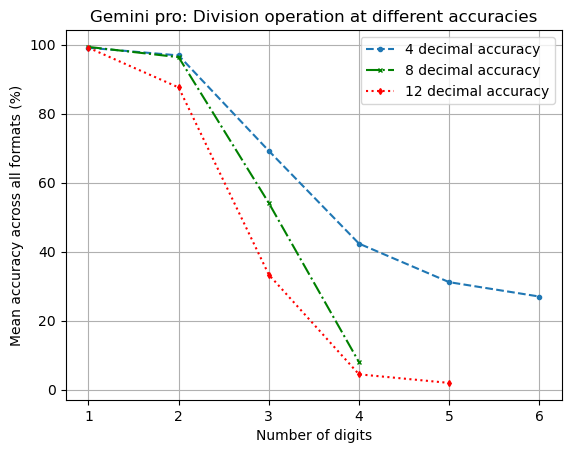

In [13]:

# plot the accuracy for different number of digits
plt.plot(digits, avg_of_non_zero_elem_for_each_digit(accuracy_acc4),marker='o',ms=3,linestyle='--',color='#1f77b4',label='4 decimal accuracy')
plt.plot(digits, avg_of_non_zero_elem_for_each_digit(accuracy_acc8),marker='x',ms=3,linestyle='-.',color='green',label='8 decimal accuracy')
plt.plot(digits, avg_of_non_zero_elem_for_each_digit(accuracy_acc12),marker='d',ms=3,linestyle=':',color='red',label='12 decimal accuracy')
plt.xlabel('Number of digits')
plt.ylabel('Mean accuracy across all formats (%)')
plt.title('Gemini pro: Division operation at different accuracies')
plt.legend()
plt.grid()
plt.savefig('gemini_response/plots/division_diff_accuracy.png')
plt.show()